In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as data

In [4]:
start = '2012-01-01'
end = '2022-08-17'
df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540045
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607438
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747405
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880662
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860233


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-11,170.990005,168.190002,170.059998,168.490005,57149200.0,168.490005
2022-08-12,172.169998,169.399994,169.820007,172.100006,67946400.0,172.100006
2022-08-15,173.389999,171.350006,171.520004,173.190002,54091700.0,173.190002
2022-08-16,173.710007,171.660004,172.779999,173.029999,56377100.0,173.029999
2022-08-17,176.149994,172.570007,172.770004,174.550003,79302100.0,174.550003


In [6]:
df= df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540045
1,2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607438
2,2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747405
3,2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880662
4,2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860233


In [7]:
df= df.drop(['Date', 'Adj Close'], axis= 1)
df.head()

,High,Low,Open,Close,Volume
0,14.732143,14.607143,14.621429,14.686786,302220800.0
1,14.810000,14.617143,14.642857,14.765714,260022000.0
2,14.948214,14.738214,14.819643,14.929643,271269600.0
3,15.098214,14.972143,14.991786,15.085714,318292800.0
4,15.276786,15.048214,15.196429,15.061786,394024400.0


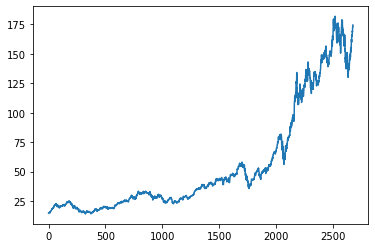

In [9]:
plt.plot(df["Close"])
plt.show()

In [12]:
# create moving average
# first 100 values are null then mean 
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2669    154.291101
2670    154.358301
2671    154.402001
2672    154.430201
2673    154.435000
Name: Close, Length: 2674, dtype: float64

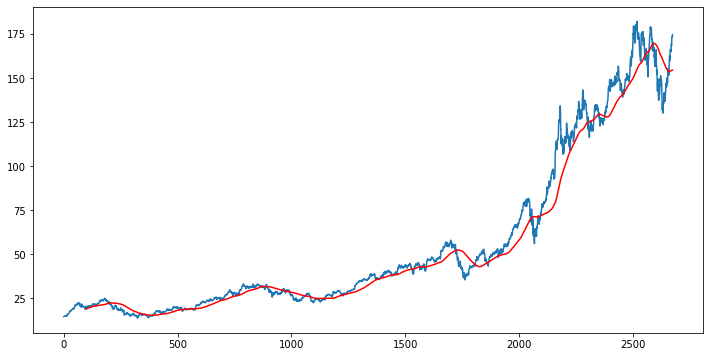

In [17]:
# plot moving average
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100, 'r')
plt.show()

In [18]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2669    159.765901
2670    159.879801
2671    160.001501
2672    160.103801
2673    160.227551
Name: Close, Length: 2674, dtype: float64

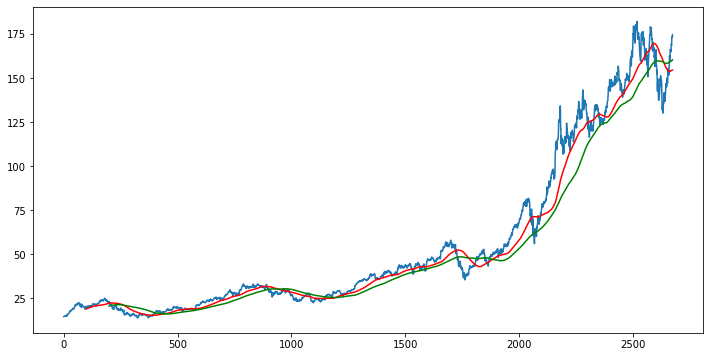

In [19]:
# plot moving average
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.show()

In [20]:
df.shape

(2674, 5)

In [23]:
# splitting date into training and testing 
data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print("training data: ",data_training.shape)
print("testing data: ", data_testing.shape)

training data:  (1871, 1)
testing data:  (803, 1)


In [25]:
data_training.head()

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [26]:
data_testing.head()

,Close
1871,48.547501
1872,48.537498
1873,48.185001
1874,48.472500
1875,49.612499


In [27]:
# scaling of data using min max scaler (0,1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [28]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.76219644],
       [0.77598137],
       [0.78863167]])

In [29]:
data_training_array.shape

(1871, 1)

In [31]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

### ML Model

In [32]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [33]:
model = Sequential()
model.add(LSTM(units= 50, activation= 'relu', return_sequences= True, 
               input_shape= (x_train.shape[1], 1)))

model.add(Dropout(0.2))


model.add(LSTM(units= 60, activation= 'relu', return_sequences= True))

model.add(Dropout(0.3))


model.add(LSTM(units= 80, activation= 'relu', return_sequences= True))

model.add(Dropout(0.4))


model.add(LSTM(units= 120, activation= 'relu'))

model.add(Dropout(0.5))


model.add(Dense(units= 1))


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [35]:
model.compile(optimizer='adam', loss="mean_squared_error")
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
56/56 [==============================] - 48s 575ms/step - loss: 0.0417
Epoch 2/50
56/56 [==============================] - 34s 604ms/step - loss: 0.0098
Epoch 3/50
56/56 [==============================] - 45s 812ms/step - loss: 0.0087
Epoch 4/50
56/56 [==============================] - 34s 607ms/step - loss: 0.0067
Epoch 5/50
56/56 [==============================] - 32s 571ms/step - loss: 0.0058
Epoch 6/50
56/56 [==============================] - 34s 605ms/step - loss: 0.0060
Epoch 7/50
56/56 [==============================] - 36s 642ms/step - loss: 0.0054
Epoch 8/50
56/56 [==============================] - 36s 647ms/step - loss: 0.0054
Epoch 9/50
56/56 [==============================] - 36s 646ms/step - loss: 0.0047
Epoch 10/50
56/56 [==============================] - 36s 639ms/step - loss: 0.0048
Epoch 11/50
56/56 [==============================] - 36s 636ms/step - loss: 0.0052
Epoch 12/50
56/56 [==============================] - 36s 647ms/step - loss: 0.0045
Epoch 13/50
5

In [37]:
# save model
model.save('keras_model.h5')

In [38]:
data_testing.head()

,Close
1871,48.547501
1872,48.537498
1873,48.185001
1874,48.472500
1875,49.612499


In [39]:
data_training.tail(100)

,Close
1771,38.965000
1772,39.205002
1773,38.325001
1774,38.480000
1775,38.174999
...,...
1866,45.634998
1867,46.305000
1868,47.537498
1869,48.145000


In [40]:
past_100_days = data_training.tail(100)

In [42]:
final_df= past_100_days.append(data_testing, ignore_index =True)

C:\Users\Pavan\AppData\Local\Temp\ipykernel_4700\2778931426.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df= past_100_days.append(data_testing, ignore_index =True)


In [43]:
final_df.head()

,Close
0,38.965000
1,39.205002
2,38.325001
3,38.480000
4,38.174999


In [44]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00549241],
       [0.007161  ],
       [0.00104287],
       [0.00212049],
       [0.        ],
       [0.0087948 ],
       [0.00625718],
       [0.00344144],
       [0.02181319],
       [0.02388154],
       [0.02402059],
       [0.03224181],
       [0.03733444],
       [0.03743875],
       [0.031703  ],
       [0.03078181],
       [0.02907845],
       [0.03161609],
       [0.03038203],
       [0.03145967],
       [0.03079918],
       [0.03168561],
       [0.03359753],
       [0.03191157],
       [0.03523135],
       [0.03742135],
       [0.03759517],
       [0.03853373],
       [0.0355442 ],
       [0.03870756],
       [0.04023709],
       [0.03968089],
       [0.03792541],
       [0.03441444],
       [0.03512707],
       [0.04553829],
       [0.04903189],
       [0.05042238],
       [0.05393333],
       [0.05808739],
       [0.0613898 ],
       [0.05880002],
       [0.06163313],
       [0.07367817],
       [0.06665625],
       [0.06264124],
       [0.05925192],
       [0.062

In [45]:
input_data.shape

(903, 1)

In [46]:
x_test = []
y_test = []

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)    
print(x_test.shape)
print(y_test.shape)

(803, 100, 1)
(803,)


In [47]:
# makeing predictions

y_predicted = model.predict(x_test)
y_predicted.shape

26/26 [==============================] - 6s 164ms/step


(803, 1)

In [48]:
y_test

array([0.07211389, 0.07204435, 0.06959365, 0.07159246, 0.0795182 ,
       0.0785101 , 0.0812737 , 0.08009178, 0.07974416, 0.07451248,
       0.08186465, 0.08176037, 0.07859701, 0.08490633, 0.08695728,
       0.0898773 , 0.08956443, 0.08224703, 0.08436752, 0.08782633,
       0.08525394, 0.08794801, 0.09126779, 0.09003373, 0.08803492,
       0.09204993, 0.08671394, 0.09476137, 0.09757709, 0.09728161,
       0.09441375, 0.09566519, 0.09903709, 0.09747281, 0.10487711,
       0.09686446, 0.08919945, 0.07063649, 0.07699796, 0.08054367,
       0.08817394, 0.083933  , 0.08304655, 0.09780305, 0.08699205,
       0.08523657, 0.09350993, 0.10020164, 0.10021901, 0.10418188,
       0.10386904, 0.08680086, 0.09349256, 0.08944278, 0.09182397,
       0.09787256, 0.09740329, 0.09211945, 0.09818543, 0.10529427,
       0.1052595 , 0.10684118, 0.11123858, 0.1232141 , 0.12234505,
       0.11480169, 0.1168005 , 0.11819099, 0.12178887, 0.11864291,
       0.11302882, 0.11474955, 0.11294191, 0.11876456, 0.11678

In [49]:
y_predicted

array([[0.11129561],
       [0.11224955],
       [0.11359844],
       [0.11522464],
       [0.11701334],
       [0.11889943],
       [0.1208154 ],
       [0.12271205],
       [0.12453887],
       [0.12625033],
       [0.12778208],
       [0.12912647],
       [0.13027641],
       [0.1312179 ],
       [0.13199428],
       [0.1326671 ],
       [0.13330829],
       [0.13396826],
       [0.134625  ],
       [0.13525939],
       [0.13587368],
       [0.13645025],
       [0.13698937],
       [0.13751332],
       [0.13803   ],
       [0.13852641],
       [0.13901359],
       [0.13946281],
       [0.1399004 ],
       [0.1403681 ],
       [0.14089242],
       [0.14146261],
       [0.14206514],
       [0.14270313],
       [0.14336163],
       [0.14407225],
       [0.14479747],
       [0.14544508],
       [0.14583361],
       [0.1458646 ],
       [0.14551637],
       [0.14486188],
       [0.14397435],
       [0.1429317 ],
       [0.14191258],
       [0.14099488],
       [0.14021248],
       [0.139

In [50]:
scaler.scale_

array([0.00695241])

In [56]:
scaler = scaler.scale_
scaler

array([0.00695241])

In [51]:
scale_factor = 1/scaler[0]

y_predicted = y_predicted * scale_factor

y_test = y_test* scale_factor

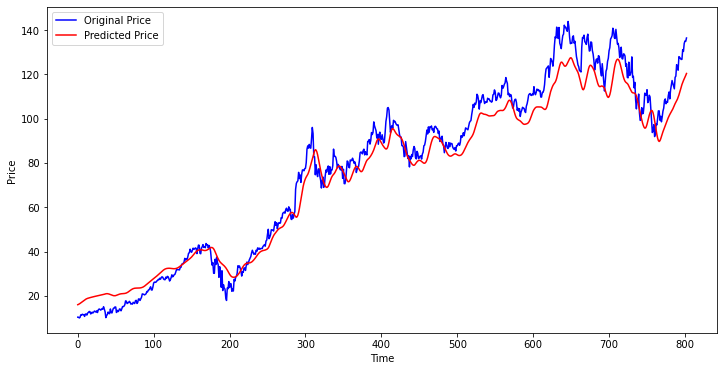

In [55]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()